# Exercice 0 : échauffement

Q1. Donnez, dans la direction 3’→ 5’, la séquence codée par le brin d'ADN suivant :

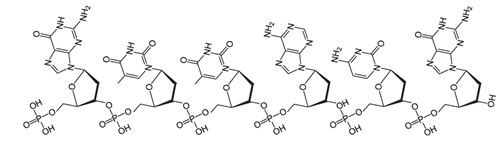

```markdown
G C A T T G
```

Q2. Quelle est le peptide codé par la séquence d’ARNm suivante ?

3’– AUA ACC AAU AUG CAA GUA CAU GCA – 5’


```markdown
IleThrAsnMetGlnHisAla
```

Q3.	Donnez toutes les séquences d'ARN (AUGC) possibles codant pour la séquence peptidique : TrpGluIleTyr.

```markdown
Trp : UGG
Glu : GAA ou GAG
Ile : AUU ou AUA ou AUC
Tyr : UAU ou UAC
```

# Exercice 1 : Annotation de cadres de lectures ouverts

Voici en cadeau le code génétique

In [14]:
genecode = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
    'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
}

import matplotlib.pyplot as plt


Q1. Téléchargez à partir de

https://www.ncbi.nlm.nih.gov/datasets/genome/

la séquence complète du génome de l’Adeno Associated Virus 2 (AAV2, identifiant NC_001401.2), **au format FASTA**.
La séquence doit faire 4679 bp.

Q2. Expliquez le format FASTA.

```markdown
Il contient une ligne de définition de la séquence, puis la séquence de nucléotides du génome.
```

## Cadres de lecture ouverts
L’annotation de séquences consiste à trouver les différents éléments présents dans une séquence (e.g. un génome), en particulier la position des différents gènes. Une manière grossière de trouver où sont les gènes est de trouver les cadres de lecture ouverts (Open Reading Frames ORFs) qui correspondent à toutes les sous-séquences entre un codon start et un codon STOP.

Q1.	Rappelez la définition d’un codon.

```markdown
C'est un code génétique qui associe 3 nucléotides successif.
```

Q2.	Quels sont les codons START canoniques. Pour quel(s) acide(s) aminé(s) codent-ils ? En quoi sont-ils spéciaux ?

```markdown
C'est AUG, qui correspond à une méthionine. Il signale le début du message génétique sur un ARMm.
```

Q3.	Quels sont les codons STOP canoniques. Pour quel(s) acide(s) aminé(s) codent-ils ? En quoi sont-ils spéciaux ?

```markdown
Les trois codons-stop sont :
- UAA (ocre)
- UAG (ambre)
- UGA (opale)

Ils terminent une séquence de traduction d'un ARMm en protéines. Ils ne correspondent à aucun acide aminé.
```

Q4. Dans quelle direction un brin d’ADN est-il lu ?

```markdown
Il est lu du 3' au 5'.
```

Q5. Comment se structure la molécule d'ADN dans une cellule ?


```markdown
C'est une structure à 2 brins complémentaires en double hélice, avec une orientation opposée.
```

Q6. Quel(s) brin(s) de la molécule d'ADN peut (peuvent) porter un gène ?

```markdown
Les 2 peuvent porter un gène, mais ils seront dans des directions opposées.
```

Q7. Qu’est-ce que le cadre de lecture ? Combien en existe-t-il ?

```markdown
C'est un mode de regroupement des nucléotides en triplets. Il commence par le codon AUG, il en existe 3 pour l'ARNm.
```

Q8. Quand utilise-t-on un cadre de lecture pour interpréter une séquence d’ADN ?

```markdown
On lit de 3 en 3 qu'à patir du moment où on a trouvé une séquence AUG.
```

Q9.	Donnez l’ensemble des ORFs présents dans le génome de l’AAV2. Présentez vos résultats au format FASTA où pour chaque ORF vous fournissez les informations :
```MARKDOWN
> pos début, pos fin, brin
séquence
```
où "pos début" est la position du premier nucléotide du codon START et "pos fin" est la position du dernier nucléotide du codon STOP (les positions sont comptées depuis le début du brin), brin est l'orientation du brin + ou - (+ est la séquence de base; - est le brin complément inverse) et séquence est simplement la séquence.

In [11]:
from pathlib import Path

filename = 'ncbi_dataset/ncbi_dataset/data/GCF_000838645.1/GCF_000838645.1_ViralProj14060_genomic.fna'
seq = Path(filename).read_text()

# Supprime la première ligne et les sauts de ligne
seq = seq[seq.index('\n'):]
seq = seq.replace('\n', '')

# Calcule le complément inverse
seq_inv = []
matching = {'A':'T', 'T': 'A', 'G':'C', 'C':'G'}
for letter in seq:
    seq_inv.append(matching[letter])
seq_inv = ''.join(seq_inv)

# print(seq)
# print(seq_inv)

def parcourt_brin(string, symbole, orfs):
    i = 0
    while i < len(string) :
        if string[i:i+3] == 'ATG':
            end = i + 3
            while end < len(string) and string[end:end+3] not in ['TAA', 'TAG', 'TGA'] :
                end += 3
            if end + 2 < len(string) :
                orfs.append((i, end + 2, symbole, string[i:end+3]))
        i += 1

def print_orfs(orfs):
    for start, stop, symbole, orf in orfs :
        print('> ', start, stop, symbole)
        print(orf)

liste = []
parcourt_brin(seq, '+', liste) # 60 théoriquement
parcourt_brin(seq_inv, '-', liste) # 117 en tout

# print(len(liste))
print_orfs(liste)

>  238 270 +
ATGTGGTCACGCTGGGTATTTAAGCCCGAGTGA
>  320 2185 +
ATGCCGGGGTTTTACGAGATTGTGATTAAGGTCCCCAGCGACCTTGACGAGCATCTGCCCGGCATTTCTGACAGCTTTGTGAACTGGGTGGCCGAGAAGGAATGGGAGTTGCCGCCAGATTCTGACATGGATCTGAATCTGATTGAGCAGGCACCCCTGACCGTGGCCGAGAAGCTGCAGCGCGACTTTCTGACGGAATGGCGCCGTGTGAGTAAGGCCCCGGAGGCCCTTTTCTTTGTGCAATTTGAGAAGGGAGAGAGCTACTTCCACATGCACGTGCTCGTGGAAACCACCGGGGTGAAATCCATGGTTTTGGGACGTTTCCTGAGTCAGATTCGCGAAAAACTGATTCAGAGAATTTACCGCGGGATCGAGCCGACTTTGCCAAACTGGTTCGCGGTCACAAAGACCAGAAATGGCGCCGGAGGCGGGAACAAGGTGGTGGATGAGTGCTACATCCCCAATTACTTGCTCCCCAAAACCCAGCCTGAGCTCCAGTGGGCGTGGACTAATATGGAACAGTATTTAAGCGCCTGTTTGAATCTCACGGAGCGTAAACGGTTGGTGGCGCAGCATCTGACGCACGTGTCGCAGACGCAGGAGCAGAACAAAGAGAATCAGAATCCCAATTCTGATGCGCCGGTGATCAGATCAAAAACTTCAGCCAGGTACATGGAGCTGGTCGGGTGGCTCGTGGACAAGGGGATTACCTCGGAGAAGCAGTGGATCCAGGAGGACCAGGCCTCATACATCTCCTTCAATGCGGCCTCCAACTCGCGGTCCCAAATCAAGGCTGCCTTGGACAATGCGGGAAAGATTATGAGCCTGACTAAAACCGCCCCCGACTACCTGGTGGGCCAGCAGCCCGTGGAGGACATTTCCAGCAATCGGATTTATAAAATTTTGGAACTAAACGGGTACGATCCCCAATATGCGGCT

Q10.	Combien d’ORFS trouvez-vous ?

In [12]:
print(len(liste))

121


Q11. Affichez les ORFs le long du génome sous forme d'un graphe (en x les positions le long du génome, en y "l'id" de l'ORF) où chaque ORF est représentée per une ligne horizontale entre les positions de départ de de fin et une valeur y par ORF.

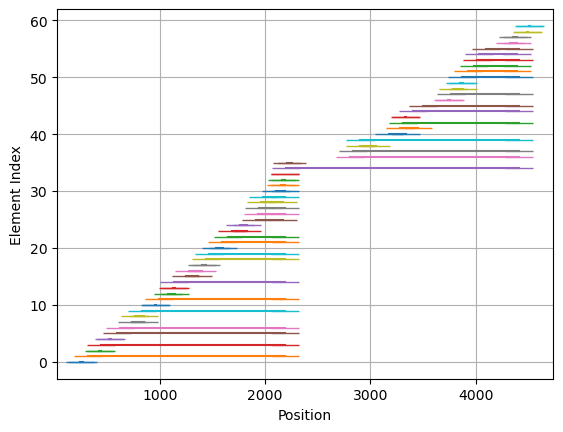

In [18]:

fig, ax = plt.subplots()

for idx, (start, stop, _, _ ) in enumerate(liste[:60]):
    ax.plot([start, stop], [idx, idx], marker='_', markersize=20, label=f'ORF {idx+1}')

ax.set_xlabel('Position')
ax.set_ylabel('Element Index')

ax.grid(True)

plt.show()


Q12. En considérant que les différentes la probabilité d’apparition d’un nucléotide à chaque position le long d’un génome sont indépendantes, quelle est la probabilité d’apparition d’un codon START en fonction de la probabilité d’apparition des différents nucléotides $p_A,p_T,p_G,p_C$ ?

```markdown
Pstart = Pa * Pt * Pg
```

Q13. Avec le même modèle, quelle est la probabilité d'apparition d'un codon STOP ?

```markdown
Pstop = Pt*Pa*Pa + Pt*Pg*Pa + Pt*Pa*Pg
```

Q14. Affichez les probabilités d'apparition des codons START et STOP le long du génome de l’AAV2. Pour chaque position vous utilisez une fenêtre glissante de 501 nucléotide centrée sur cette position pour calculer la fréquence d’apparition des différents nucléotides (vous pouvez négliger les 501 premièrs et dernières nucléotides).

In [ ]:
#Votre code ici

Q15.	Téléchargez l’annotation du génome à partir de Genbank :

https://www.ncbi.nlm.nih.gov/datasets/gene/GCF_000838645.1/

Comparez les ORFS que vous avez trouvé avec le génome annoté (on s’intéresse à l’annotation « gene »).

In [ ]:
#Votre code ici

Q16. Qu’observez-vous ?

```markdown
Votre réponse ici
```

# Exercice 2 : biais d’utilisation des codons

Le code génétique étant redondant, plusieurs codons codent pour un même acide aminé. A l’inverse, cela veut dire que pour stocker un même acide aminé dans le génome, un organisme a différentes possibilités. Dans cet exercice, on va étudier si différents organismes ont des préférences différentes pour coder différents acides aminés ?

Q1. Récupperez les génomes des organismes suivants à partir de Genbank:
1.	AAV2 - NC_001401.2
2.	Plasmodium Falciparum 3D7 Chromosome 9 – AL844508
3.	Escherichia coli souche BL21 - NZ_CP053601
4.	Homo Sapiens Chromosome 10 build GRCh38.p14 - NC_000010.11

Q2. Calculez la fréquence d’apparition de chaque codon présents dans chacun de ces génomes.

In [ ]:
#Votre code ici

Q3. Affichez les résultats sous forme de heatmap avec en axe x les acides aminés et en axe y les codons. Chaque case représente en niveau de couleur la fréquence d'apparition d'un codon pour un acide aminé.

In [ ]:
#Votre code ici

Q4. Ces heatmaps sont-elles similaires ?

```markdown
Votre réponse ici
```

# Exercice 3 : optimisation de codons

L’exercice précédent nous a montré qu’il existait bien un biais dans l’utilisation des codons synonymes entre différents organismes. En pratique, si une séquence d’ADN d’un organisme ne suit pas son biais d'utilisation de codons, cela peut avoir un impact sur sa vitesse de traduction et donc la quantité de protéines associées.

Si on souhaite introduire dans un organisme un gène provenant d’un autre organisme il est donc préférable d’optimiser la séquence selon les biais de codons de l’organisme cible.

Q1. Créer un code qui prend en entrée une séquence d’ADN codante et une table de fréquence d’utilisation des codons pour un organisme et retourne la séquence produisant la même protéine mais utilisant uniquement les codons les plus fréquemment utilisés selon la table donnée.

In [ ]:
#Votre code ici

Q2. On va combiner les deux derniers exercices: écrivez un code qui prend en entrée un id de génome et une séquence à optimiser. Votre code télécharge le génome, calcule la table de biais de codons et optimise la séquence d'entrée pour cette table.

In [ ]:
 #Votre code ici